<a href="https://colab.research.google.com/github/KrishnaSChavan/MachineLearning/blob/main/Transfer_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifiying multiple images with transfer learning

In [24]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip

zip_r = zipfile.ZipFile('10_food_classes_10_percent.zip')
zip_r.extractall()
zip_r.close()

--2023-06-02 18:03:20--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.97.128, 74.125.196.128, 142.251.162.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.97.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.2’

10_food_classes_10_ 100%[===================>] 160.74M   160MB/s    in 1.0s    

2023-06-02 18:03:21 (160 MB/s) - ‘10_food_classes_10_percent.zip.2’ saved [168546183/168546183]



In [25]:
import tensorflow as tf
import pandas as pd
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential,layers
import pathlib


In [26]:
import os
for dirpath, dirnames, filenames in os.walk("10_food_classes_10_percent"): 
  print(f"There are {dirnames} directories and {len(filenames)} images in '{dirpath}'.")

There are ['train', 'test'] directories and 0 images in '10_food_classes_10_percent'.
There are ['chicken_wings', 'steak', 'ramen', 'grilled_salmon', 'pizza', 'fried_rice', 'chicken_curry', 'hamburger', 'ice_cream', 'sushi'] directories and 0 images in '10_food_classes_10_percent/train'.
There are [] directories and 75 images in '10_food_classes_10_percent/train/chicken_wings'.
There are [] directories and 75 images in '10_food_classes_10_percent/train/steak'.
There are [] directories and 75 images in '10_food_classes_10_percent/train/ramen'.
There are [] directories and 75 images in '10_food_classes_10_percent/train/grilled_salmon'.
There are [] directories and 75 images in '10_food_classes_10_percent/train/pizza'.
There are [] directories and 75 images in '10_food_classes_10_percent/train/fried_rice'.
There are [] directories and 75 images in '10_food_classes_10_percent/train/chicken_curry'.
There are [] directories and 75 images in '10_food_classes_10_percent/train/hamburger'.
There

In [27]:
IMAGE_SHAPE = (224,224)
BATCH_SIZE = 32

train_dir = '/content/10_food_classes_10_percent/train'
test_dir = '/content/10_food_classes_10_percent/test'


train_datagen = ImageDataGenerator(rescale=(1/255.))
test_datagen = ImageDataGenerator(rescale=(1/255.))

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size = IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)
test_data = train_datagen.flow_from_directory(
    test_dir,
    target_size = IMAGE_SHAPE,
    batch_size = BATCH_SIZE,
    class_mode = 'categorical'
)

Found 750 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


CALLBACKS

tensorboard callback




In [28]:
import datetime
def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name+"/"+experiment_name+"/"+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tb_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f'path = {log_dir}')
    return tb_callback

In [29]:
import datetime

def create_tensorboard_callback(dir_name,experiment_name):
    log_dir = dir_name+'/'+experiment_name+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)
    print(f"saving tensorboard file to {log_dir}")
    return tensorboard_callback

https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1

In [30]:
effnet_url = 'https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1'
resnet_url = 'https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5'



In [31]:
# def create_model(model_url,num_classes=10):

#     # download model
#     feature_extraction_layer = hub.KerasLayer(model_url,trainable=False,name="feature_extraction",input_shape=IMAGE_SHAPE+(3,))

#     # create our own model
#     model = Sequential({
#         feature_extraction_layer,
#         Dense(num_classes,activation='softmax',name='output')
#     })

#     return model

####

#Use models.add 


####


In [32]:
def create_model(model_url, num_classes=10):
    # download model
    feature_extraction_layer = hub.KerasLayer(model_url, trainable=False, name="feature_extraction", input_shape=IMAGE_SHAPE+(3,))
    
    # create our own model
    model = Sequential()
    model.add(feature_extraction_layer)
    model.add(Dense(num_classes, activation='softmax', name='output'))
    
    return model


In [33]:
# create Resnet model from tf_hub 

resnet_model = create_model(resnet_url)

In [34]:
def c(model_url,n_c=10):

    feature_extraction = hub.KerasLayer(model_url,trainable=False,name="feature",input_shape=IMAGE_SHAPE+(3,))

    model = Sequential([
        feature_extraction,
        Dense(n_c,activation='softmax',name='output_layer')
    ])

    return model

In [35]:
effnet_model = c(effnet_url)

In [39]:
effnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature (KerasLayer)        (None, 1280)              4049564   
                                                                 
 output_layer (Dense)        (None, 10)                12810     
                                                                 
Total params: 4,062,374
Trainable params: 12,810
Non-trainable params: 4,049,564
_________________________________________________________________


In [40]:
resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction (KerasLa  (None, 2048)             23564800  
 yer)                                                            
                                                                 
 output (Dense)              (None, 10)                20490     
                                                                 
Total params: 23,585,290
Trainable params: 20,490
Non-trainable params: 23,564,800
_________________________________________________________________


In [49]:
# compile model

resnet_model.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics=['accuracy']
)

In [42]:
history=resnet_model.fit(
            train_data,
            epochs = 5,
            steps_per_epoch =len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data)
        )

Epoch 1/5
24/24 [==============================] - 35s 834ms/step - loss: 1.9130 - accuracy: 0.3973 - val_loss: 1.1534 - val_accuracy: 0.6344
Epoch 2/5
24/24 [==============================] - 25s 1s/step - loss: 0.8811 - accuracy: 0.7613 - val_loss: 0.8322 - val_accuracy: 0.7316
Epoch 3/5
24/24 [==============================] - 24s 1s/step - loss: 0.6119 - accuracy: 0.8293 - val_loss: 0.7352 - val_accuracy: 0.7584
Epoch 4/5
24/24 [==============================] - 24s 1s/step - loss: 0.4769 - accuracy: 0.8733 - val_loss: 0.6900 - val_accuracy: 0.7760
Epoch 5/5
24/24 [==============================] - 24s 1s/step - loss: 0.3743 - accuracy: 0.9120 - val_loss: 0.6676 - val_accuracy: 0.7828


In [ ]:
pd.DataFrame(history.history).plot()

In [44]:
effnet_model.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(),
    metrics = ['accuracy']
)

In [45]:
effnet_history = effnet_model.fit(
    train_data,
    epochs = 5,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
24/24 [==============================] - 35s 1s/step - loss: 1.7882 - accuracy: 0.5093 - val_loss: 1.2456 - val_accuracy: 0.7616
Epoch 2/5
24/24 [==============================] - 20s 860ms/step - loss: 1.0298 - accuracy: 0.7893 - val_loss: 0.8356 - val_accuracy: 0.8248
Epoch 3/5
24/24 [==============================] - 17s 714ms/step - loss: 0.7393 - accuracy: 0.8400 - val_loss: 0.6805 - val_accuracy: 0.8444
Epoch 4/5
24/24 [==============================] - 17s 744ms/step - loss: 0.5977 - accuracy: 0.8640 - val_loss: 0.6015 - val_accuracy: 0.8536
Epoch 5/5
24/24 [==============================] - 17s 708ms/step - loss: 0.5051 - accuracy: 0.9013 - val_loss: 0.5509 - val_accuracy: 0.8640


<Axes: >

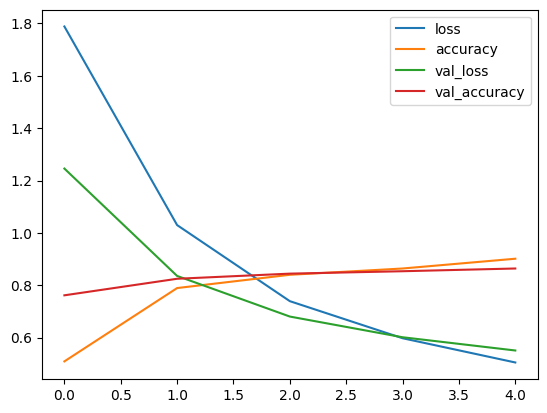

In [47]:
pd.DataFrame(effnet_history.history).plot()

<Axes: >

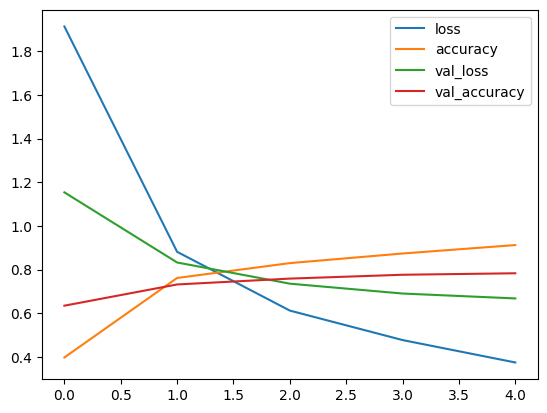

In [48]:
pd.DataFrame(history.history).plot()

In [50]:
resnet_history = resnet_model.fit(
    train_data,
    epochs = 5,
    steps_per_epoch=len(train_data),
    validation_data = test_data,
    validation_steps=len(test_data),
    callbacks=[
        create_tensorboard_callback(dir_name='tensorflow_hub',
                                    experiment_name='resnet50 v2')
    ]
    
)

saving tensorboard file to tensorflow_hub/resnet50 v220230602-183522
Epoch 1/5
24/24 [==============================] - 21s 821ms/step - loss: 0.3375 - accuracy: 0.9173 - val_loss: 0.6375 - val_accuracy: 0.7880
Epoch 2/5
24/24 [==============================] - 18s 756ms/step - loss: 0.2355 - accuracy: 0.9547 - val_loss: 0.6366 - val_accuracy: 0.7824
Epoch 3/5
24/24 [==============================] - 18s 782ms/step - loss: 0.1851 - accuracy: 0.9693 - val_loss: 0.6503 - val_accuracy: 0.7756
Epoch 4/5
24/24 [==============================] - 18s 755ms/step - loss: 0.1415 - accuracy: 0.9853 - val_loss: 0.6132 - val_accuracy: 0.7924
Epoch 5/5
24/24 [==============================] - 20s 856ms/step - loss: 0.1146 - accuracy: 0.9907 - val_loss: 0.6070 - val_accuracy: 0.7940


<Axes: >

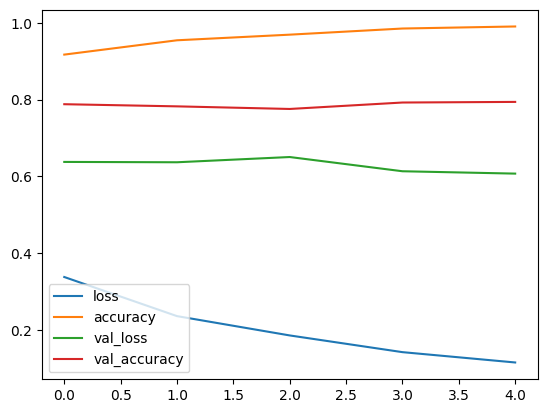

In [51]:
pd.DataFrame(resnet_history.history).plot()